In [442]:
import math  
import matplotlib.pyplot as plt
#state(x,y,theta of the agv and four trolleys)    
r=0.5
l=1
def model(state,actuators):
    d1=2 # Distance between AGV and trolley 1
    d2=2
    d3=2
    d4=2
    dt=1
    vr=actuators[0] 
    vl=actuators[1]
    v=r/2*(vr+vl) #Linear Velocity 
    w=r/l*(vr-vl) #Angular Velocity
    
    new_state=[]
    #AGV
    x0=state[0]+v*dt*math.cos(state[2]) 
    y0=state[1]+v*dt*math.sin(state[2])
    t0=state[2]+w*dt
    new_state.append(x0)
    new_state.append(y0)
    new_state.append(t0)
    
    
    #Trolley1:
    t1=state[5]+v/d1 * math.sin(state[2]-state[5])
    x1=new_state[0]-d1*math.cos(state[5])
    y1=new_state[1]-d1*math.sin(state[5])
    new_state.append(x1)
    new_state.append(y1)
    new_state.append(t1)
   
    #Trolley2:
    t2=state[8]+v/d2 *math.cos(state[2]-state[5])* math.sin(state[5]-state[8] )
    x2=new_state[3]-d2*math.cos(state[8])
    y2=new_state[4]-d2*math.sin(state[8])
    new_state.append(x2)
    new_state.append(y2)
    new_state.append(t2)
    
    #Trolley3:
    t3=state[11]+v/d3 *(math.cos(state[5]-state[7])+math.cos(state[2]-state[5]))* math.sin(state[8]-state[11] )
    x3=new_state[6]-d3*math.cos(state[11])
    y3=new_state[7]-d3*math.sin(state[11])
    new_state.append(x3)
    new_state.append(y3)
    new_state.append(t3)
    
    #Trolley4:
    t4=state[14]+v/d4 *(math.cos(state[7]-state[9])+math.cos(state[5]-state[7])+math.cos(state[2]-state[5]))* math.sin(state[11]-state[14] )
    x4=new_state[9]-d4*math.cos(state[14])
    y4=new_state[10]-d4*math.sin(state[14])
    
    new_state.append(x4)
    new_state.append(y4)
    new_state.append(t4)
    
    return new_state

#state(x,y,theta of the agv and four trolleys)    
state=[10,10,45,8,8,45,6,6,45,4,4,45,2,2,45]
#actuators=vr,vl
actuators=[1.2,1]

new_state= model(state,actuators)
print(new_state)






[10.288927093849752, 10.467996938493766, 45.1, 9.238283116214292, 8.76618988942553, 45.0, 8.187639138578833, 7.064382840357292, 45.0, 7.136995160943373, 5.362575791289055, 45.0, 6.086351183307913, 3.660768742220818, 45.0]


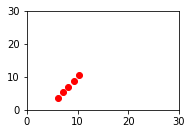

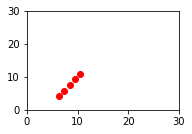

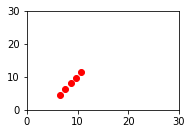

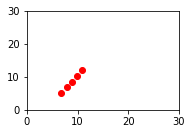

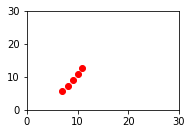

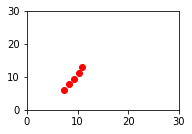

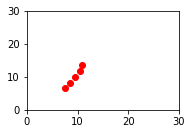

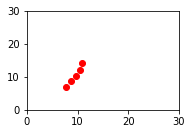

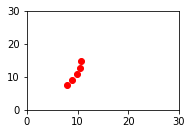

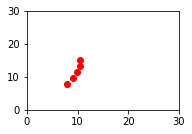

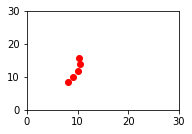

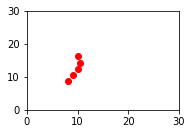

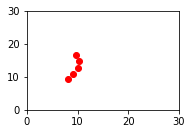

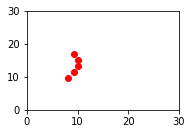

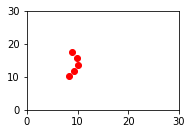

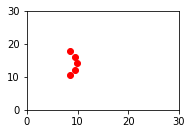

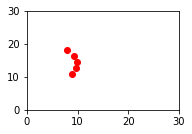

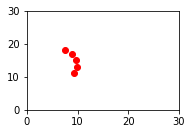

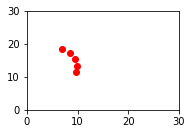

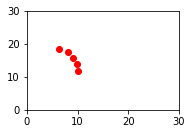

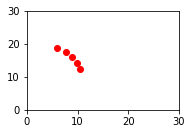

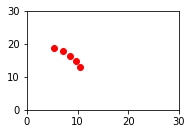

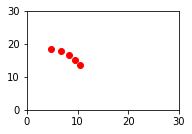

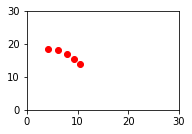

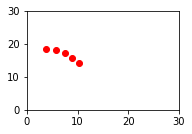

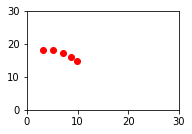

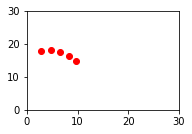

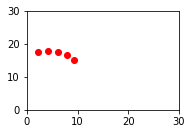

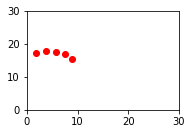

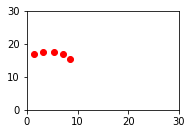

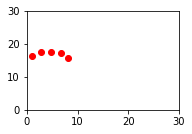

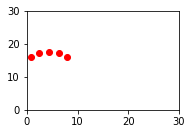

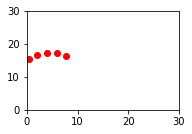

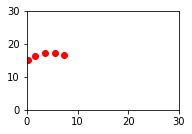

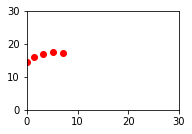

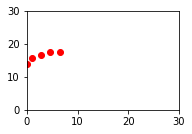

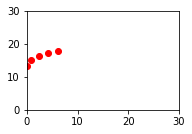

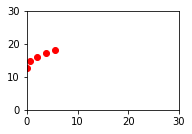

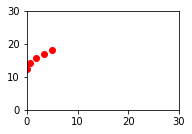

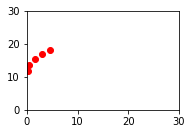

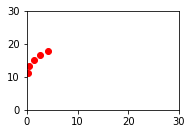

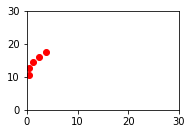

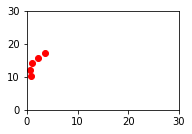

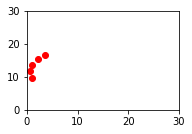

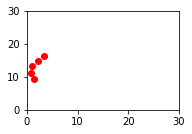

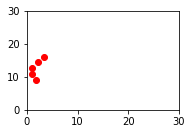

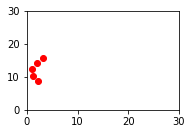

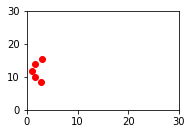

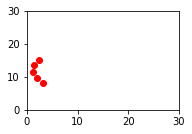

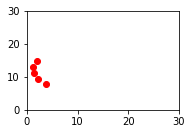

In [443]:
for i in range(0,50):
    new_state= model(state,actuators)
    lst1=[new_state[0],new_state[3],new_state[6],new_state[9],new_state[12]]
    lst2=[new_state[1],new_state[4],new_state[7],new_state[10],new_state[13]]
    #print(new_state)
    plt.subplot(223)
    plt.plot(lst1, lst2, 'ro')
    plt.axis([0, 30, 0, 30])
    plt.show()
    state=new_state
    


